# Analyse Exploratoire  des Tickets Support et Préparation

## 1. Installation et Importations

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Chargement du Dataset

In [9]:
data = pd.read_csv("../data/dataset.csv")
data.head(5)

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [10]:
print(f"Nombre de tickets : {len(data)}")
data.info()

Nombre de tickets : 20000
<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 2.3 MB


In [11]:
data.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


## 3. Analyse des Valeurs Manquantes et Doublons

In [12]:
print("Valeurs manquantes par colonne :")
print(data.isnull().sum())



Valeurs manquantes par colonne :
subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64


In [13]:
duplicates = data.duplicated(subset=['subject', 'body']).sum()
print(f"Nombre de doublons exacts : {duplicates}") 

Nombre de doublons exacts : 0


#### Suppression des colonnes contenant trop de valeurs manquantes

In [16]:
limit = len(data) * 0.5
df = data.dropna(thresh=limit, axis=1)
df.columns


Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5'],
      dtype='str')

####  Traitement des valeurs manquantes

In [28]:
# Remplacer les NaN par une chaîne vide
for col in df :
    df[col] = df[col].fillna('')

print("le nombre totale des valeures manquantes apres traitemntes:",df.isnull().sum().sum())

le nombre totale des valeures manquantes apres traitemntes: 0


## 3. Analyse Exploratoire (EDA)

### 3.1 Distribution de la cible

Text(0.5, 1.0, 'Distribution des types de tickets (Target)')

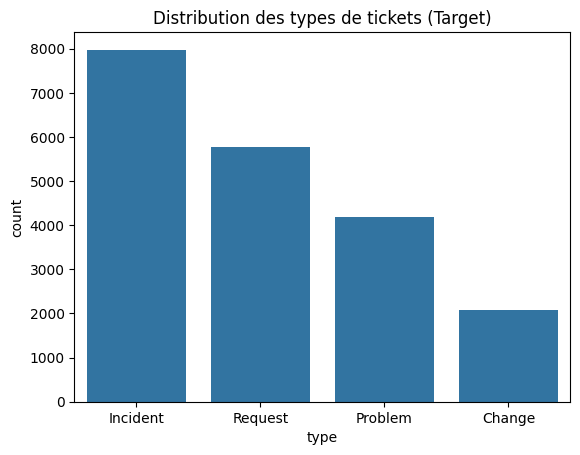

In [29]:
sns.countplot(data=df,x=df["type"])
plt.title("Distribution des types de tickets (Target)")


### 3.2 Fusion des champs texte (subject + body)

In [38]:
# Fusionner sujet et corps pour avoir la longueur totale
df['text_raw'] = df['subject']+ " " + df['body']
 

In [39]:
print("Exemple de fusion :")
print(f"Subject: {df['subject'].iloc[0]}")
print(f"Body: {df['body'].iloc[0][:50]}...")
print(f"Fusionné: {df['text_raw'].iloc[0][:100]}...")

Exemple de fusion :
Subject: Unvorhergesehener Absturz der Datenanalyse-Plattform
Body: Die Datenanalyse-Plattform brach unerwartet ab, da...
Fusionné: Unvorhergesehener Absturz der Datenanalyse-Plattform Die Datenanalyse-Plattform brach unerwartet ab,...


### 3.2 Analyse de la longueur des emails

In [40]:
 # Calculer les longueurs
df['char_count'] = df['text_raw'].str.len()



In [41]:
df['words'] = df['text_raw'].str.split()
df['word_count'] = df['words'].str.len()

In [42]:
print(df[['char_count', 'word_count']].describe())

         char_count   word_count
count  20000.000000  20000.00000
mean     437.032700     62.16330
std      250.291682     36.82158
min        5.000000      1.00000
25%      241.000000     33.00000
50%      401.000000     57.00000
75%      595.000000     87.00000
max     2284.000000    283.00000
